## Import libraries

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import librosa
import librosa.display

In [23]:
file = os.listdir('cats_dogs')[0]
path_name = 'cats_dogs/'+file
path_name

'cats_dogs/cat_1.wav'

In [24]:
df = pd.read_csv('train_test_split.csv')

In [25]:
df.head()

,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  115 non-null    int64 
 1   test_cat    49 non-null     object
 2   test_dog    49 non-null     object
 3   train_cat   115 non-null    object
 4   train_dog   64 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.6+ KB


## Read data and show as audio

In [27]:
import IPython.display as ipd

In [28]:
ipd.Audio(path_name) #load a local WAV file

## Convert the sound to numpy Array

In [60]:
y, sr = librosa.load(os.listdir()[0], duration=0.11)
audio_as_array = librosa.feature.melspectrogram(y=y, sr=sr)

In [29]:
#audio_as_array.shape

In [42]:
type(audio_as_array)

numpy.ndarray

In [61]:
audio_as_array[:5]

array([[0.01224559, 0.0097869 , 0.00286325, 0.00522454, 0.01268233],
       [0.01666839, 0.02376545, 0.02496228, 0.07456166, 0.06924289],
       [0.03819501, 0.05173852, 0.03186565, 0.06036221, 0.09959415],
       [0.01452345, 0.01653944, 0.03165159, 0.12234247, 0.09615722],
       [0.00484724, 0.00536515, 0.04987467, 0.19380441, 0.05777191]],
      dtype=float32)

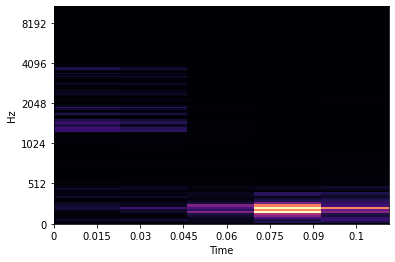

In [62]:
librosa.display.specshow(audio_as_array, y_axis='mel', x_axis='time')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

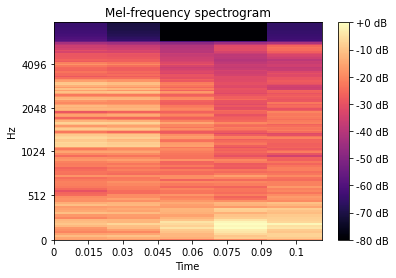

In [63]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(audio_as_array, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## Wave plot

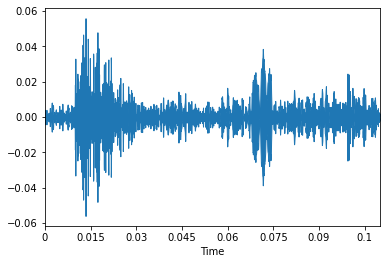

In [64]:
librosa.display.waveplot(y, sr=sr)

In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw

## Spectral bandwith

In [65]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_bandwidth(S=S)

array([[1682.22947761, 1664.28506277, 1743.5695571 , 1962.87371719,
        2341.05570604]])

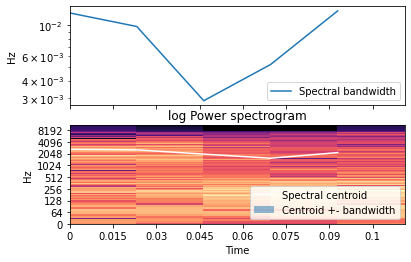

In [71]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(audio_as_array)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, audio_as_array[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - audio_as_array[0], centroid[0] + audio_as_array[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

In [29]:
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'Audio_Feature_Extraction.ipynb',
 'bagpipe.wav',
 'cats_dogs',
 'README.md',
 'train_test_split.csv',
 'utils.py']

In [30]:
music_file = 'bagpipe.wav'

In [31]:
y, sr = librosa.load(music_file)
audio_as_array = librosa.feature.melspectrogram(y=y, sr=sr)

In [35]:
audio_as_array.shape

(128, 1292)

In [36]:
audio_as_array

array([[3.59569907e-01, 4.83193219e-01, 4.98684704e-01, ...,
        3.97271872e-01, 5.00923872e-01, 4.53315020e-01],
       [6.66667242e-03, 1.68538895e-02, 2.57065333e-02, ...,
        7.18008727e-03, 3.88749829e-03, 1.08878165e-02],
       [4.46892940e-02, 2.21356396e-02, 1.38850147e-02, ...,
        1.71558429e-02, 1.24668805e-02, 2.80972719e-02],
       ...,
       [6.03196677e-04, 6.06491696e-04, 7.33485795e-04, ...,
        6.23804051e-04, 6.82410668e-04, 5.86852664e-04],
       [7.94106629e-04, 8.87131260e-04, 7.62099982e-04, ...,
        1.70054031e-04, 1.96450186e-04, 2.40137786e-04],
       [6.28090056e-04, 6.25531946e-04, 3.93998431e-04, ...,
        1.07001906e-04, 1.10142064e-04, 1.51284301e-04]], dtype=float32)

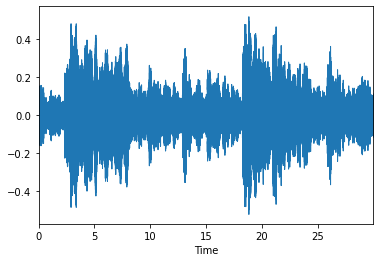

In [37]:
librosa.display.waveplot(y, sr)

In [38]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

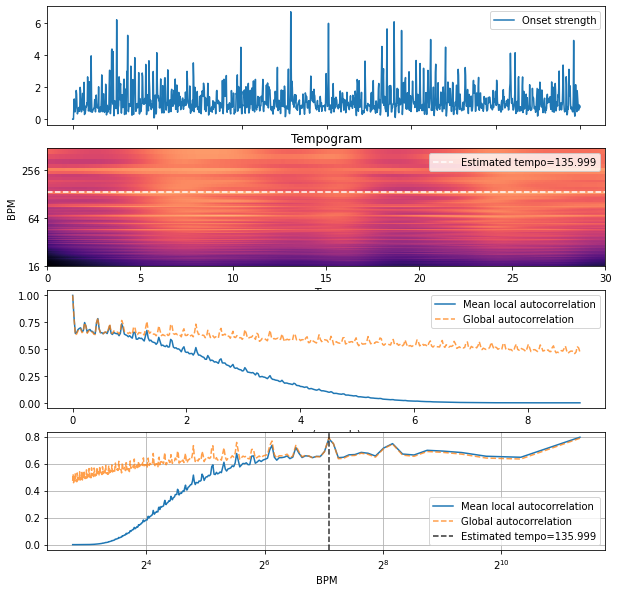

In [39]:
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

In [40]:
y

array([ 0.01165771,  0.00048828, -0.00613403, ...,  0.06869507,
        0.05725098,  0.01708984], dtype=float32)

In [41]:
type(y)

numpy.ndarray